In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.Y[i]


class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        y_pred = self.sigmoid(x)
        return y_pred

In [3]:
X = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32)
Y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32)

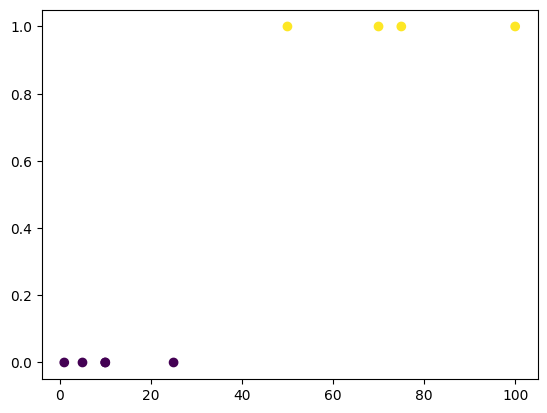

In [4]:
plt.scatter(X, Y, c=Y)
plt.show()

In [5]:
dataset = CustomDataset(X, Y)
dataloader = DataLoader(dataset)

In [6]:
model = LogisticRegression(1, 1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [7]:
loss_list = []
for epoch in range(1000):
    running_loss = 0.0
    optimizer.zero_grad()
    
    for x, y in dataloader:
        y_p = model(x)
        loss = criterion(y_p, y)
        running_loss += loss

    running_loss = running_loss / len(dataloader)
    running_loss.backward()
    optimizer.step()

    loss_list.append(running_loss.item())

    if epoch % 100 == 0:
        print("The parameters are w={:.4f}, b={:.4f} and loss={:.4f}".format(model.linear.weight.item(), model.linear.bias.item(), running_loss.item()))

The parameters are w=-0.4875, b=0.7295 and loss=17.5303
The parameters are w=0.0372, b=0.4177 and loss=0.6599
The parameters are w=0.0473, b=0.1199 and loss=0.5784
The parameters are w=0.0472, b=-0.1487 and loss=0.5038
The parameters are w=0.0459, b=-0.3898 and loss=0.4420
The parameters are w=0.0426, b=-0.6064 and loss=0.3907
The parameters are w=0.0440, b=-0.8022 and loss=0.3517
The parameters are w=0.0477, b=-0.9808 and loss=0.3198
The parameters are w=0.0512, b=-1.1445 and loss=0.2929
The parameters are w=0.0544, b=-1.2952 and loss=0.2701


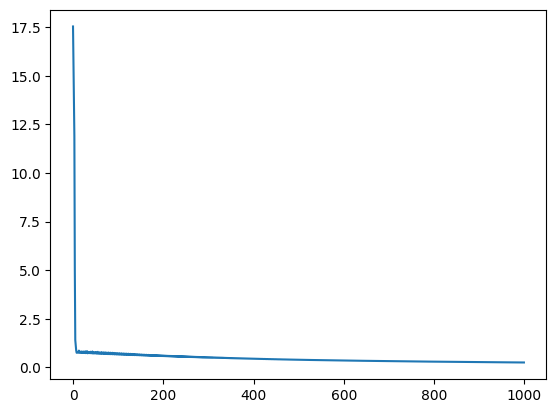

In [8]:
plt.plot(loss_list)
plt.show()